In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
file_path = "spotify_songs.csv"
df = pd.read_csv(file_path)
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [45]:
print(df.shape)
df = df.dropna()
df = df.drop_duplicates(subset="track_id")
print(df.shape)
df.head()

(32833, 23)
(28352, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [46]:
relevant_columns = [
    "track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]
df = df[relevant_columns]

danceability        0.046574
energy             -0.103511
key                -0.007879
loudness            0.037337
mode                0.016131
speechiness         0.005440
acousticness        0.091625
instrumentalness   -0.124547
liveness           -0.052753
valence             0.022594
tempo               0.004322
duration_ms        -0.139676
Name: track_popularity, dtype: float64


/var/folders/8y/z54f8_6n19qfj1pkdc_jwtjw0000gq/T/ipykernel_6691/3287747243.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


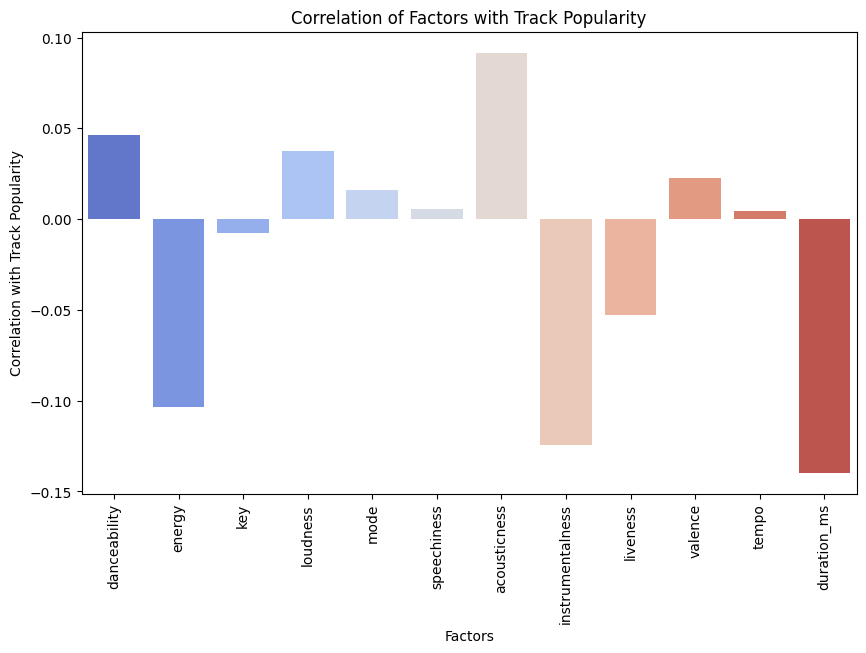

In [47]:
corr_matrix = df.corr()

# Extract the correlations with track popularity
popularity_corr = corr_matrix["track_popularity"].drop("track_popularity")

# Display the correlations
print(popularity_corr)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(
    x=popularity_corr.index, y=popularity_corr.values, palette="coolwarm"
)
plt.xticks(rotation=90)
plt.xlabel("Factors")
plt.ylabel("Correlation with Track Popularity")
plt.title("Correlation of Factors with Track Popularity")
plt.show()

In [48]:
features = df.drop("track_popularity", axis=1)
labels = df["track_popularity"]

# One-hot encode categorical features if necessary
features = pd.get_dummies(features)

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Define the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=2,
)

grid_search.fit(features_train, labels_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
train_predictions = best_model.predict(features_train)
test_predictions = best_model.predict(features_test)

# Evaluate the model on training data
train_mse = mean_squared_error(labels_train, train_predictions)
train_r2 = r2_score(labels_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R-squared: {train_r2}")

# Evaluate the model on testing data
test_mse = mean_squared_error(labels_test, test_predictions)
test_r2 = r2_score(labels_test, test_predictions)
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R-squared: {test_r2}")

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame(
    {"Feature": features.columns, "Importance": feature_importances}
)

# Sort the DataFrame by importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# Print the feature importances
print(features_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=features_df, palette="coolwarm")
plt.title("Feature Importances in RandomForestRegressor")
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [56]:
features = df.drop("track_popularity", axis=1)
labels = df["track_popularity"]

# One-hot encode categorical features if necessary
# features = pd.get_dummies(features)

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=0
)

# Train a Decision Tree Regressor model
model = RandomForestRegressor(random_state=42, max_depth=20)
model.fit(features_train, labels_train)

# Make predictions
train_predictions = model.predict(features_train)
test_predictions = model.predict(features_test)

# Evaluate the model on training data
train_mse = mean_squared_error(labels_train, train_predictions)
train_r2 = r2_score(labels_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R-squared: {train_r2}")

# Evaluate the model on testing data
test_mse = mean_squared_error(labels_test, test_predictions)
test_r2 = r2_score(labels_test, test_predictions)
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R-squared: {test_r2}")

# feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
# features_df = pd.DataFrame(
#     {"Feature": features.columns, "Importance": feature_importances}
# )

# # Sort the DataFrame by importance
# features_df = features_df.sort_values(by="Importance", ascending=False)

# # Print the feature importances
# print(features_df)

# # Plot the feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x="Importance", y="Feature", data=features_df, palette="coolwarm")
# plt.title("Feature Importances in DecisionTreeRegressor")
# plt.show()

Training Mean Squared Error: 119.53994572553694
Training R-squared: 0.7865884048295433
Testing Mean Squared Error: 541.1168704009154
Testing R-squared: 0.04675373912780756


In [37]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_mse = cross_val_score(
    model, features, labels, scoring="neg_mean_squared_error", cv=5
)
cv_r2 = cross_val_score(model, features, labels, scoring="r2", cv=5)

print(f"Cross-validated Mean Squared Error: {-cv_mse.mean()}")
print(f"Cross-validated R-squared: {cv_r2.mean()}")

Cross-validated Mean Squared Error: 1073.1018086473487
Cross-validated R-squared: -1.0382978628371293
